FUNCTION dijkstra(graph, start_node, target_node):
    # Initialize distances to all nodes as infinity (∞)
    distance = {node: infinity for node in graph}
    # Set the distance of the start node to 0
    distance[start_node] = 0

    # Priority queue to store (distance, node) pairs
    priority_queue = [(0, start_node)]  # (current distance, current node)

    # Dictionary to keep track of the shortest path
    previous_node = {node: None for node in graph}

    WHILE priority_queue is not empty:
        # Extract the node with the smallest distance
        current_distance, current_node = HEAP_POP(priority_queue)

        # If the current node is the target node, we are done
        IF current_node == target_node:
            BREAK

        # Loop through all neighboring nodes
        FOR neighbor, weight in graph[current_node]:
            # Calculate new potential distance to neighbor
            new_distance = current_distance + weight

            # If a shorter path to neighbor is found
            IF new_distance < distance[neighbor]:
                # Update the shortest distance to neighbor
                distance[neighbor] = new_distance
                # Store the path
                previous_node[neighbor] = current_node
                # Add neighbor to the priority queue
                HEAP_PUSH(priority_queue, (new_distance, neighbor))

    # Reconstruct the shortest path from start_node to target_node
    path = []
    current = target_node
    WHILE current is not None:
        path.insert(0, current)  # Insert node at the beginning of the path
        current = previous_node[current]

    RETURN path, distance[target_node]

Mounted at /content/drive
Shortest path from S1 to S21: ['S1', 'S2', 'S3', 'S7', 'S6', 'S20', 'S21']
Total distance: 12 km


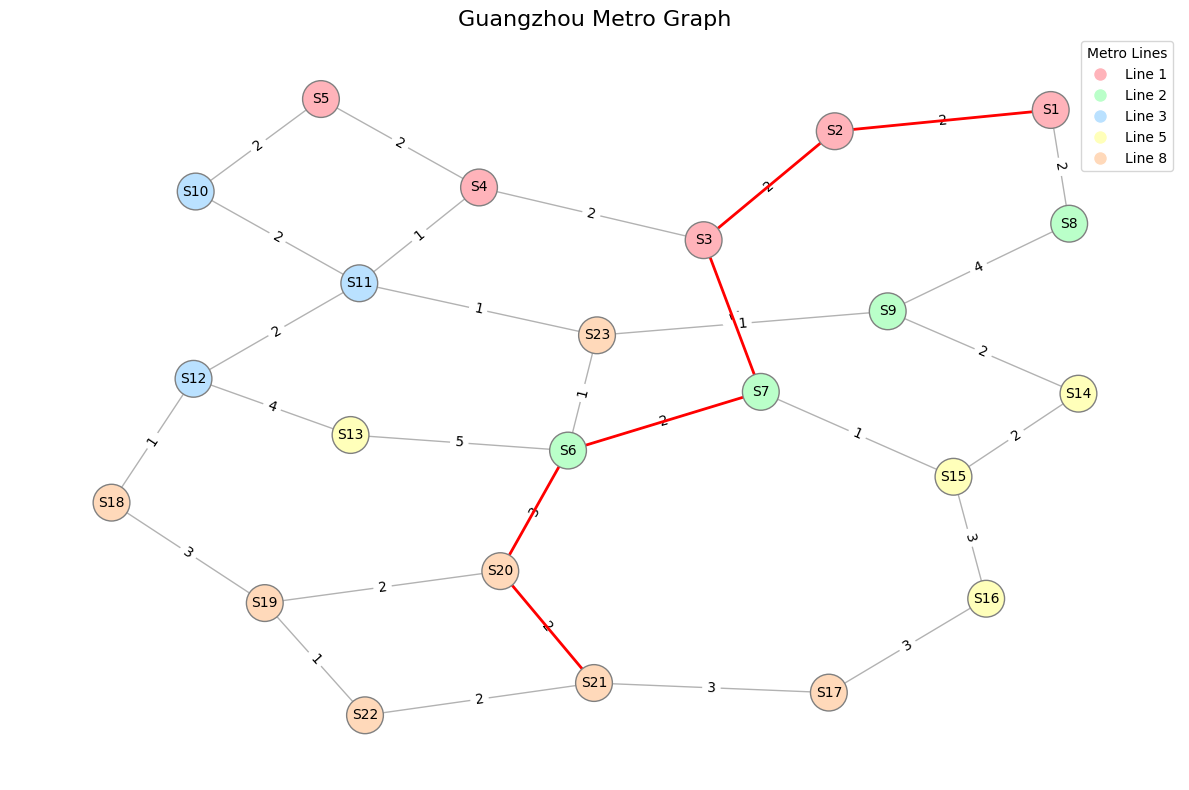

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
from json import dumps
import matplotlib.colors as mcolors
import random
import numpy as np
from google.colab import drive

drive.mount("/content/drive", force_remount=True)


# Adjacency list (Guangzhou Metro graph)
adjacency_list = {
    # Line 1
    "S1": [("S2", 2), ("S8", 2)],
    "S2": [("S3", 2)],
    "S3": [("S4", 2), ("S7", 1)],
    "S4": [("S5", 2), ("S11", 1)],
    "S5": [("S10", 2)],

    # Line 2
    "S6": [("S20", 3)],
    "S7": [("S6", 2), ("S15", 1)],
    "S8": [("S9", 4)],
    "S9": [("S23", 1)],

    # Line 3
    "S10": [("S11", 2)],
    "S11": [("S12", 2), ("S23", 1)],
    "S12": [("S13", 4), ("S18", 1)],

    # Line 5
    "S13": [("S6", 5)],
    "S15": [("S16", 3), ("S14", 2)],
    "S14": [("S9", 2)],
    "S16": [("S17", 3)],

    # Line 8
    "S17": [("S21", 3)],
    "S18": [("S19", 3)],
    "S19": [("S20", 2)],
    "S20": [("S21", 2)],
    "S21": [("S22", 2)],
    "S22": [("S19", 1)],
    "S23": [("S6", 1)],
}


# Create a graph
G = nx.Graph()

# Add nodes and edges to the graph
for src, neighbors in adjacency_list.items():
    for dest, weight in neighbors:
        G.add_edge(src, dest, weight=weight)

# Modified Dijkstra's algorithm to work with NetworkX graph
def dijkstra(graph, start_id, end_id):
    # Initialize distances to infinity for all nodes except the start node
    distances = {node: float('inf') for node in graph.nodes()}
    # Set start node distance to 0
    distances[start_id] = 0
    # Create queue to store (distance, node)
    unvisited = list(graph.nodes())
    # Keep track of path
    previous_nodes = {}

    while unvisited:
        # Find the unvisited node with the smallest distance
        current_node = min(unvisited, key=lambda node: distances[node])

        # If we have reached the destination, we can stop
        if current_node == end_id:
            break

        # Check neighbors
        for neighbor in graph.neighbors(current_node):
            weight = graph[current_node][neighbor]['weight']
            # Calculate distance to neighbor
            distance = distances[current_node] + weight

            # If we've found a shorter path, update the distance and previous node
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_nodes[neighbor] = current_node

        # Mark the current node as visited
        unvisited.remove(current_node)

    # Reconstruct the path
    path = []
    current_node = end_id
    while current_node != start_id:
        path.insert(0, current_node)
        current_node = previous_nodes.get(current_node)
        if current_node is None:
            return None, None  # No path found
    path.insert(0, start_id)

    total_distance = distances[end_id]

    print(f"Shortest path from {start_id} to {end_id}: {path}", flush=True)
    print(f"Total distance: {total_distance} km", flush=True)

    return path, total_distance

# Updated function to visualize the graph
def visualize_graph(G, shortest_path=None):
    # Set a fixed seed for reproducibility
    seed = 42
    random.seed(seed)
    np.random.seed(seed)

    # Use Kamada-Kawai layout for better spacing
    pos = nx.kamada_kawai_layout(G, weight=None)
    plt.figure(figsize=(12, 8))

    # Define colors for different metro lines
    line_colors = {
        'Line 1': '#FFB3BA',  # Light Pink
        'Line 2': '#BAFFC9',  # Light Green
        'Line 3': '#BAE1FF',  # Light Blue
        'Line 5': '#FFFFBA',  # Light Yellow
        'Line 8': '#FFD9BA',  # Light Orange
    }

    # Assign colors to nodes based on their line
    node_colors = []
    for node in G.nodes():
        if node in ['S1', 'S2', 'S3', 'S4', 'S5']:
            node_colors.append(line_colors['Line 1'])
        elif node in ['S6', 'S7', 'S8', 'S9']:
            node_colors.append(line_colors['Line 2'])
        elif node in ['S10', 'S11', 'S12']:
            node_colors.append(line_colors['Line 3'])
        elif node in ['S13', 'S14', 'S15', 'S16']:
            node_colors.append(line_colors['Line 5'])
        elif node in ['S17', 'S18', 'S19', 'S20', 'S21', 'S22', 'S23']:
            node_colors.append(line_colors['Line 8'])
        else:
            node_colors.append('#CCCCCC')  # Gray for any unassigned nodes

    # Draw edges
    nx.draw_networkx_edges(G, pos, alpha=0.3, width=1)

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color=node_colors, edgecolors='gray')

    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=10)

    # Draw edge labels
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

    # Highlight the shortest path if provided
    if shortest_path:
        path_edges = list(zip(shortest_path, shortest_path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)

    # Add a legend with correct line numbers
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', label=f'{line_num}',
                   markerfacecolor=color, markersize=10)
        for line_num, color in line_colors.items()
    ]
    plt.legend(handles=legend_elements, loc='best', title='Metro Lines')

    plt.title("Guangzhou Metro Graph", fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Run Dijkstra's algorithm from station S1 to station S21
start, end = "S1", "S21"
shortest_path, total_distance = dijkstra(G, start, end)

# Visualize the graph with the shortest path
visualize_graph(G, shortest_path)


Shortest path from S1 to S18: ['S1', 'S2', 'S3', 'S4', 'S11', 'S12', 'S18']
Total distance: 10 km


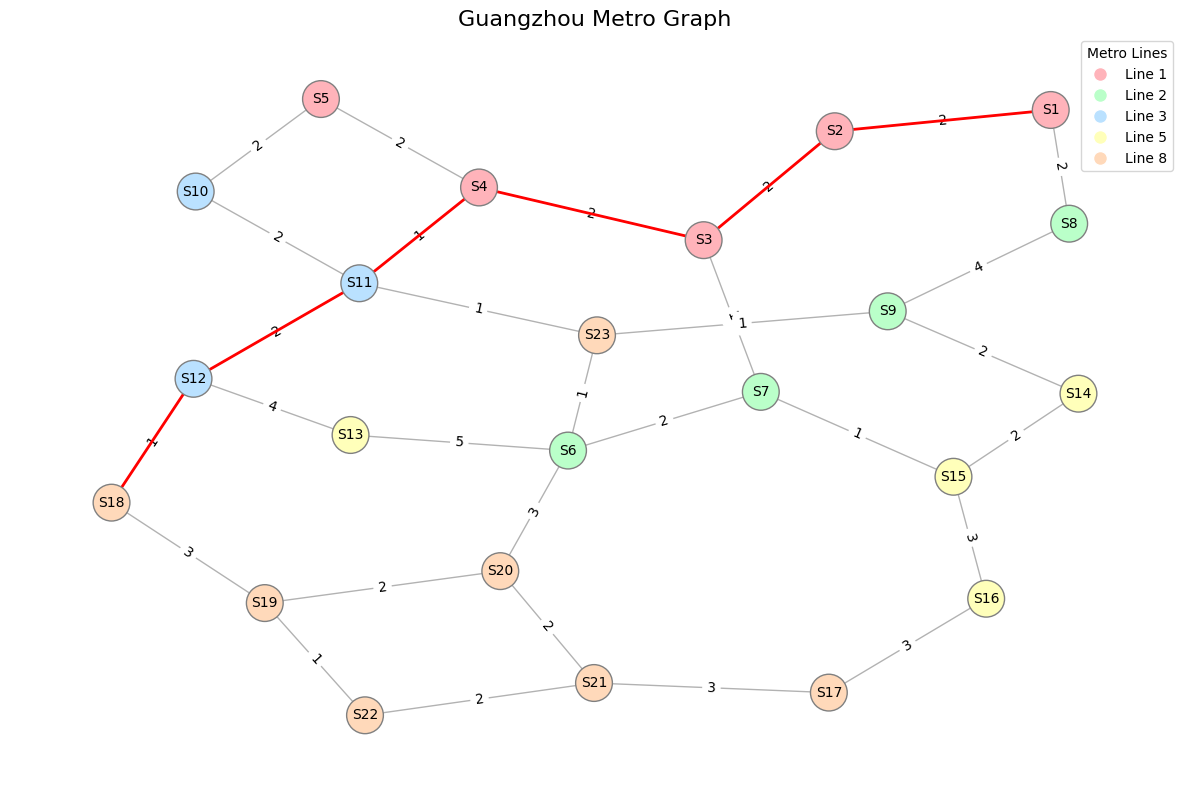

In [8]:
# Run Dijkstra's algorithm from station S1 to station S18
start, end = "S1", "S18"
shortest_path, total_distance = dijkstra(G, start, end)

# Visualize the graph with the shortest path
visualize_graph(G, shortest_path)

Shortest path from S1 to S19: ['S1', 'S2', 'S3', 'S7', 'S6', 'S20', 'S19']
Total distance: 12 km


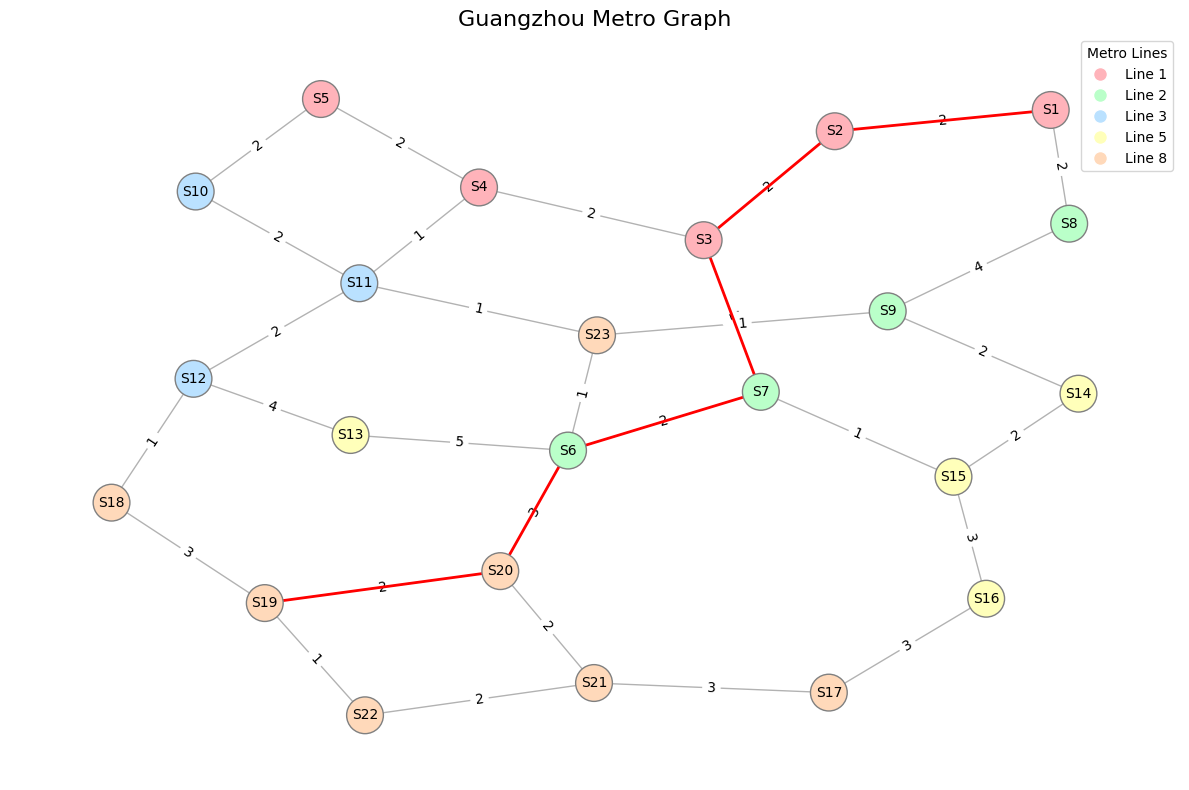

In [9]:
# Run Dijkstra's algorithm from station S1 to station S13
start, end = "S1", "S19"
shortest_path, total_distance = dijkstra(G, start, end)

# Visualize the graph with the shortest path
visualize_graph(G, shortest_path)

In [11]:
%%shell
jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/Analysis of Algorithms/Project 1 Metro Simulation.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Analysis of Algorithms/Project 1 Metro Simulation.ipynb to html
[NbConvertApp] Writing 1039049 bytes to /content/drive/MyDrive/Colab Notebooks/Analysis of Algorithms/Project 1 Metro Simulation.html
